In [12]:
import pandas as pd
from plot_triad import plot_triad_eop
from eop_post_cf import anomalies_from_pred, AnomalyConfig, WeightConfig, compute_eop

In [24]:
policies_CL = [
    ("2021-04-01", "Ley 21325 \nApril 2021", "red"),
    ("2021-03-01", "US Policy", "yellow")
]

policies_PE = [
    ("2019-07-15", "Visa Requirement\nJune 2019", "Red"),
    ("2021-03-01", "US Policy", "yellow"),
    ("2021-07-01", "Temporary Permit Carnet (CPT)\nJuly 2021", "green"),
    ("2021-10-22", "CPT Implementation\nOctober 2021", "red")
]

policies_EC = [
    ("2019-07-25", "Presidential Decree 826\nJuly 2019", "red"),
    ("2021-03-01", "US Policy", "yellow"),
    ("2019-08-26", "VIRTE\nBefore July 2019", "blue"),
    ("2022-06-01", "VIRTE\nSep 2022 to Aug 2023", "blue")
]

In [13]:
# ---- 1) Paths (EDIT THESE) ----
pred_path = "/Users/wenlanzhang/PycharmProjects/Mapineq/src/case_study/Migration/Excess_migration/4plot/pred_CF.csv"   
flows_path = "/Users/wenlanzhang/PycharmProjects/Mapineq/src/case_study/Migration/Excess_migration/4plot/df_flow.csv" 
train_end = "2021-12-01"     # training window end used by CF++

# ---- 2) Load ----
pred = pd.read_csv(pred_path)
flows = pd.read_csv(flows_path)

In [14]:
# ---- 3) Anomalies (Z or percent excess) ----
anom_cfg = AnomalyConfig(train_end=train_end, eps=1.0, use_standardized=True)  # Z by default
pred_anom = anomalies_from_pred(pred, anom_cfg)
print("Estimated phi_hat:", pred_anom.attrs.get('phi_hat'))
pred_anom

Estimated phi_hat: 198.2734976527645


,orig,dest,month,flow,mu_hat,excess_pct,z_std
0,AR,BO,2019-01-01,3325.0,1683.635924,0.974893,2.840851
1,AR,BO,2019-02-01,3275.0,1918.952188,0.706661,2.198420
2,AR,BO,2019-03-01,2686.0,2125.230992,0.263863,0.863870
3,AR,BO,2019-04-01,2089.0,1983.698926,0.053083,0.167905
4,AR,BO,2019-05-01,2084.0,1981.840832,0.051548,0.162971
...,...,...,...,...,...,...,...
14683,VE,UY,2022-08-01,122.0,279.563993,-0.563606,-0.669243
14684,VE,UY,2022-09-01,121.0,272.940836,-0.556680,-0.653142
14685,VE,UY,2022-10-01,161.0,333.461041,-0.517185,-0.670712
14686,VE,UY,2022-11-01,149.0,260.249331,-0.427472,-0.489745


In [15]:
# ---- 4) Triads & windows ----
triads = [
    ("VE","CL","US"),
    ("VE","PE","US"),
    ("VE","EC","US"),
    ("VE","CO","US"),
    ("CO","VE","US"),

    
    # add more, e.g. ("HTI","DOM","USA"), ("SYR","TUR","DEU")
]

In [16]:
windows = [
    # # Basic windows (no gating), with 3-month smoothing for w
    # WeightConfig(window="m12_24", smooth_ma=3, gate_mode=None,
    #              label="m12_24|ma3", train_end=train_end),

    WeightConfig(window="m6_18",  smooth_ma=3, gate_mode=None,
                 label="m6_18|ma3", train_end=train_end),

    # WeightConfig(window="upto_12",smooth_ma=3, gate_mode=None,
    #              label="upto_12|ma3", train_end=train_end),

#     # Optional gating: only count w when the window-mean share is "unusually high"
#     WeightConfig(window="m12_24", smooth_ma=3, gate_mode="zscore", z_thresh=1.0,
#                  label="m12_24|z≥1.0|ma3", train_end=train_end),

#     # Or percentile-based gate (top 10% of baseline months)
#     WeightConfig(window="m12_24", smooth_ma=3, gate_mode="percentile", perc_thresh=0.90,
#                  label="m12_24|p90|ma3", train_end=train_end),
]

In [17]:
# ---- 5) Compute EOP ----
eop = compute_eop(pred_anom, flows, triads, windows, anomaly_kind="z_std")  # or 'excess_pct'

# eop.to_csv("/Users/wenlanzhang/PycharmProjects/Mapineq/src/case_study/Migration/Excess_migration/4plot/0915_eop_results.csv", index=False)
# print("Saved: eop_results.csv")

# eop = pd.read_csv("/Users/wenlanzhang/PycharmProjects/Mapineq/src/case_study/Migration/Excess_migration/4plot/0915_eop_results.csv")
eop

,i,j,k,label,window,month,flow_jk,mu_hat_jk,anom_jk,w_ij,EOP
192,CO,VE,US,m6_18|ma3,m6_18,2019-01-01,4133.0,5048.147228,-0.914729,0.000000,-0.000000
193,CO,VE,US,m6_18|ma3,m6_18,2019-02-01,4594.0,5753.710187,-1.085783,0.000000,-0.000000
194,CO,VE,US,m6_18|ma3,m6_18,2019-03-01,5294.0,6372.208379,-0.959236,0.000000,-0.000000
195,CO,VE,US,m6_18|ma3,m6_18,2019-04-01,4736.0,5947.844241,-1.115924,0.000000,-0.000000
196,CO,VE,US,m6_18|ma3,m6_18,2019-05-01,4763.0,5942.273005,-1.086440,0.000000,-0.000000
...,...,...,...,...,...,...,...,...,...,...,...
91,VE,PE,US,m6_18|ma3,m6_18,2022-08-01,11343.0,2321.264483,13.298279,0.436827,5.809041
92,VE,PE,US,m6_18|ma3,m6_18,2022-09-01,13345.0,2266.271353,16.527290,0.449308,7.425840
93,VE,PE,US,m6_18|ma3,m6_18,2022-10-01,16403.0,2768.780282,18.401520,0.453040,8.336627
94,VE,PE,US,m6_18|ma3,m6_18,2022-11-01,9258.0,2160.891761,10.842579,0.450914,4.889067


In [18]:
# # 这代码不对 还没改window and label

# # ---- 6) Quick summaries ----
# # Peak month per triad & window
# peaks = (eop.sort_values(['i','j','k','window','EOP'], ascending=[True,True,True,True,False])
#            .groupby(['i','j','k','window'])
#            .head(10)[['i','j','k','window','month','EOP']])
# print("Peaks:")
# peaks

Peaks:


,i,j,k,window,month,EOP
229,CO,VE,US,m6_18,2022-02-01,6.115150
228,CO,VE,US,m6_18,2022-01-01,5.516773
230,CO,VE,US,m6_18,2022-03-01,3.432560
227,CO,VE,US,m6_18,2021-12-01,2.896817
223,CO,VE,US,m6_18,2021-08-01,2.564431
225,CO,VE,US,m6_18,2021-10-01,2.331408
226,CO,VE,US,m6_18,2021-11-01,2.324413
224,CO,VE,US,m6_18,2021-09-01,2.320891
222,CO,VE,US,m6_18,2021-07-01,1.992933
238,CO,VE,US,m6_18,2022-11-01,1.684945


In [4]:
# # 这代码不对 还没改window and label

# # 2022 annual means
# eop['year'] = pd.to_datetime(eop['month']).dt.year
# ann_2022 = (eop[eop['year']==2022]
#             .groupby(['i','j','k','window'])['EOP']
#             .mean()
#             .reset_index()
#             .sort_values(['i','j','k','window']))
# print("2022 means:")
# ann_2022

2022 means:


,i,j,k,window,EOP
0,VE,EC,US,m12_24,0.197664
1,VE,EC,US,m6_18,0.665479
2,VE,EC,US,upto_12,0.832038
3,VE,PE,US,m12_24,1.167768
4,VE,PE,US,m6_18,4.216485
5,VE,PE,US,upto_12,5.189384


In [5]:
eop

,i,j,k,label,window,month,flow_jk,mu_hat_jk,anom_jk,w_ij,EOP,year
0,VE,EC,US,m12_24|ma3,m12_24,2019-01-01,1850.0,5611.025892,-3.565766,0.000000,-0.000000,2019
1,VE,EC,US,m12_24|z≥1.0|ma3,m12_24,2019-01-01,1850.0,5611.025892,-3.565766,0.000000,-0.000000,2019
2,VE,EC,US,m12_24|p90|ma3,m12_24,2019-01-01,1850.0,5611.025892,-3.565766,0.000000,-0.000000,2019
3,VE,EC,US,m12_24|ma3,m12_24,2019-02-01,3072.0,6395.260553,-2.951229,0.000000,-0.000000,2019
4,VE,EC,US,m12_24|z≥1.0|ma3,m12_24,2019-02-01,3072.0,6395.260553,-2.951229,0.000000,-0.000000,2019
...,...,...,...,...,...,...,...,...,...,...,...,...
475,VE,PE,US,upto_12|ma3,upto_12,2022-08-01,11343.0,2321.264483,13.298279,0.529023,7.035102,2022
476,VE,PE,US,upto_12|ma3,upto_12,2022-09-01,13345.0,2266.271353,16.527290,0.526254,8.697556,2022
477,VE,PE,US,upto_12|ma3,upto_12,2022-10-01,16403.0,2768.780282,18.401520,0.523591,9.634868,2022
478,VE,PE,US,upto_12|ma3,upto_12,2022-11-01,9258.0,2160.891761,10.842579,0.521861,5.658318,2022


In [20]:
# eop124 = eop[eop['window'] == 'm12_24']
# eop124 = eop[(eop['i'] == 'VE') & (eop['j'] == 'PE') & (eop['k'] == 'US') & (eop['label'] == 'm12_24|ma3')]
eopPE = eop[(eop['i'] == 'VE') & (eop['j'] == 'PE') & (eop['k'] == 'US')]
eopPE

,i,j,k,label,window,month,flow_jk,mu_hat_jk,anom_jk,w_ij,EOP
48,VE,PE,US,m6_18|ma3,m6_18,2019-01-01,1444.0,1925.194723,-0.778845,0.000000,-0.000000
49,VE,PE,US,m6_18|ma3,m6_18,2019-02-01,1653.0,2194.272866,-0.820613,0.000000,-0.000000
50,VE,PE,US,m6_18|ma3,m6_18,2019-03-01,2368.0,2430.147416,-0.089531,0.000000,-0.000000
51,VE,PE,US,m6_18|ma3,m6_18,2019-04-01,1715.0,2268.309110,-0.825058,0.000000,-0.000000
52,VE,PE,US,m6_18|ma3,m6_18,2019-05-01,1632.0,2266.184427,-0.946097,0.000000,-0.000000
53,VE,PE,US,m6_18|ma3,m6_18,2019-06-01,1795.0,2350.625838,-0.813876,0.000000,-0.000000
54,VE,PE,US,m6_18|ma3,m6_18,2019-07-01,1890.0,2270.445818,-0.567029,0.000000,-0.000000
55,VE,PE,US,m6_18|ma3,m6_18,2019-08-01,2029.0,2339.802279,-0.456312,0.000000,-0.000000
56,VE,PE,US,m6_18|ma3,m6_18,2019-09-01,1544.0,1891.991997,-0.568169,0.228738,-0.129962
57,VE,PE,US,m6_18|ma3,m6_18,2019-10-01,1490.0,1939.334509,-0.724621,0.463753,-0.336045


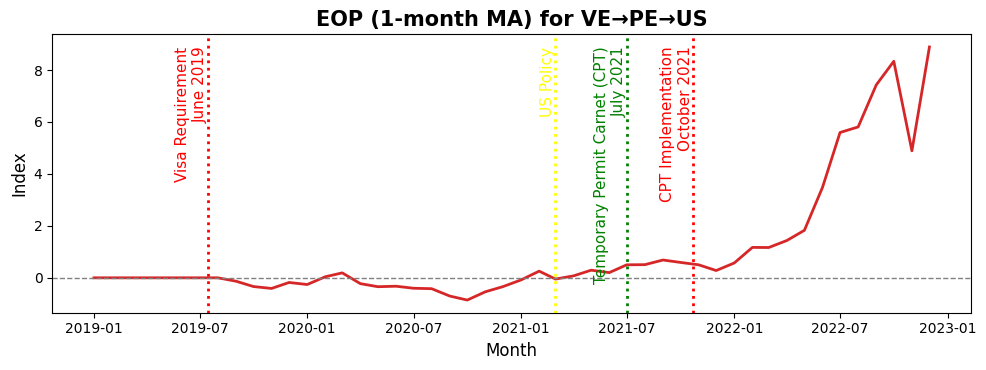

In [25]:
plot_triad_eop(
    eopPE,
    i="VE", j="PE", k="US",
    ma=1,
    # policies=[("2022-03-01", "Policy Change", "tab:green")],
    policies=policies_PE,
    line_colors={"eop": "tab:red"},
    eop_col="EOP",
)

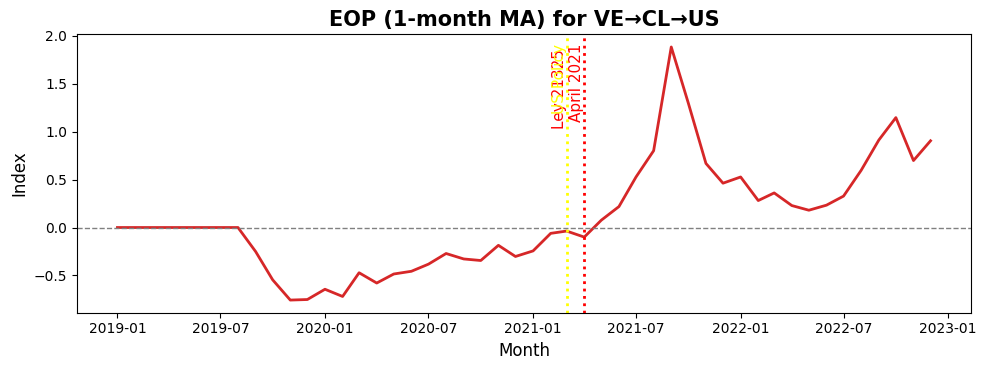

In [26]:
eopCL = eop[(eop['i'] == 'VE') & (eop['j'] == 'CL') & (eop['k'] == 'US')]

plot_triad_eop(
    eopCL,
    i="VE", j="CL", k="US",
    ma=1,
    policies=policies_CL,
    # policies=[("2022-03-01", "Policy Change", "tab:green")],
    line_colors={"eop": "tab:red"},
    eop_col="EOP",
)

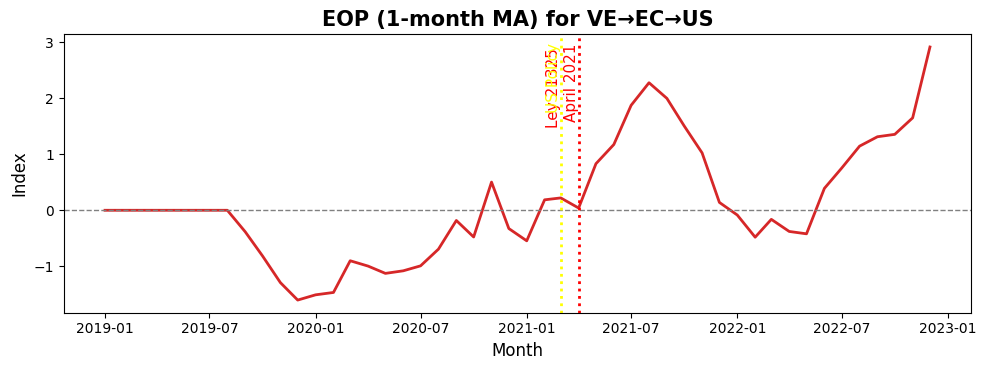

In [30]:
eopCL = eop[(eop['i'] == 'VE') & (eop['j'] == 'EC') & (eop['k'] == 'US')]

plot_triad_eop(
    eopCL,
    i="VE", j="EC", k="US",
    ma=1,
    policies=policies_CL,
    # policies=[("2022-03-01", "Policy Change", "tab:green")],
    line_colors={"eop": "tab:red"},
    eop_col="EOP",
)

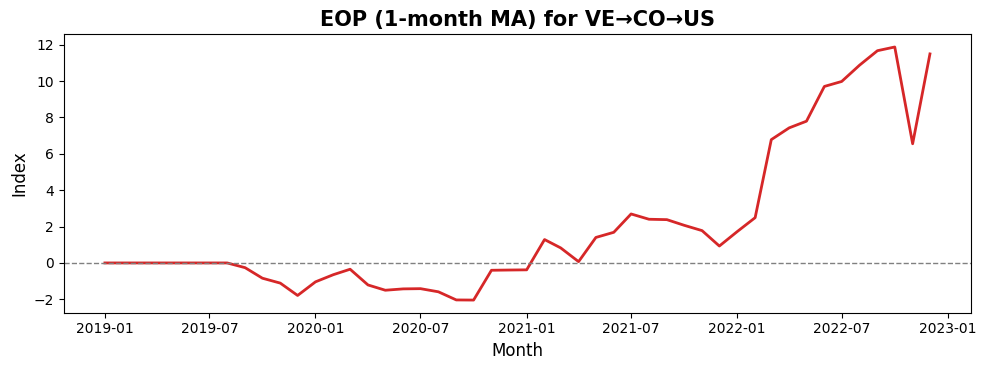

In [29]:
eopCL = eop[(eop['i'] == 'VE') & (eop['j'] == 'CO') & (eop['k'] == 'US')]

plot_triad_eop(
    eopCL,
    i="VE", j="CO", k="US",
    ma=1,
    # policies=policies_CO,
    line_colors={"eop": "tab:red"},
    eop_col="EOP",
)

In [ ]:
# Usage example for eop_post_cf.py
# Inputs:
#   pred_path  -> your saved CF++ predictions with columns: orig, dest, month, flow, mu_hat
#   flows_path -> observed flows (same schema as in pred; used only for computing weights w)

import pandas as pd
from eop_post_cf import anomalies_from_pred, AnomalyConfig, WeightConfig, compute_eop

# ---- 1) Paths (EDIT THESE) ----
pred_path = "pred.csv"       # <-- replace with your file
flows_path = "flows.csv"     # <-- replace with your file
train_end = "2021-12-01"     # training window end used by CF++

# ---- 2) Load ----
pred = pd.read_csv(pred_path)
flows = pd.read_csv(flows_path)

# ---- 3) Anomalies (Z or percent excess) ----
anom_cfg = AnomalyConfig(train_end=train_end, eps=1.0, use_standardized=True)  # Z by default
pred_anom = anomalies_from_pred(pred, anom_cfg)
print("Estimated phi_hat:", pred_anom.attrs.get('phi_hat'))

# ---- 4) Triads & windows ----
triads = [
    ("VEN","CHL","USA"),
    ("VEN","PER","USA"),
    ("VEN","ECU","USA"),
    # add more, e.g. ("HTI","DOM","USA"), ("SYR","TUR","DEU")
]

windows = [
    # Basic windows (no gating), with 3-month smoothing for w
    WeightConfig(window="m12_24", smooth_ma=3, gate_mode=None, train_end=train_end),
    WeightConfig(window="m6_18",  smooth_ma=3, gate_mode=None, train_end=train_end),
    WeightConfig(window="upto_12",smooth_ma=3, gate_mode=None, train_end=train_end),

    # Optional gating: only count w when the window-mean share is "unusually high"
    WeightConfig(window="m12_24", smooth_ma=3, gate_mode="zscore", z_thresh=1.0, train_end=train_end),
    # Or percentile-based gate (top 10% of baseline months)
    WeightConfig(window="m12_24", smooth_ma=3, gate_mode="percentile", perc_thresh=0.90, train_end=train_end),
]

# ---- 5) Compute EOP ----
eop = compute_eop(pred_anom, flows, triads, windows, anomaly_kind="z_std")  # or 'excess_pct'
eop.to_csv("eop_results.csv", index=False)
print("Saved: eop_results.csv")

# ---- 6) Quick summaries ----
# Peak month per triad & window
peaks = (eop.sort_values(['i','j','k','window','EOP'], ascending=[True,True,True,True,False])
           .groupby(['i','j','k','window'])
           .head(1)[['i','j','k','window','month','EOP']])
print("Peaks:")
print(peaks)

# 2022 annual means
eop['year'] = pd.to_datetime(eop['month']).dt.year
ann_2022 = (eop[eop['year']==2022]
            .groupby(['i','j','k','window'])['EOP']
            .mean()
            .reset_index()
            .sort_values(['i','j','k','window']))
print("2022 means:")
print(ann_2022)